In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test_numeric.csv', 'train_categorical.csv', 'sample_submission.csv', 'train_numeric.csv', 'train_date.csv', 'test_date.csv', 'test_categorical.csv']


In [6]:
#read the partial data from files
#loading only part of the data
train_num=pd.read_csv("../input/train_numeric.csv",nrows=100000)
print(train_num.shape)
train_num.head()

(100000, 970)


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,...,L3_S45_F4126,L3_S45_F4128,L3_S45_F4130,L3_S45_F4132,L3_S47_F4138,L3_S47_F4143,L3_S47_F4148,L3_S47_F4153,L3_S47_F4158,L3_S47_F4163,L3_S47_F4168,L3_S47_F4173,L3_S47_F4178,L3_S47_F4183,L3_S47_F4188,L3_S48_F4193,L3_S48_F4196,L3_S48_F4198,L3_S48_F4200,L3_S48_F4202,L3_S48_F4204,L3_S49_F4206,L3_S49_F4211,L3_S49_F4216,L3_S49_F4221,L3_S49_F4226,L3_S49_F4231,L3_S49_F4236,L3_S50_F4241,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001,-0.004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073,0.138,-0.336,0.506,-0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038,-0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,-0.272,-0.051,0.037,0.004,0.0,-0.081,0.311,0.003,0.021,0.015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
train_num=train_num.dropna(axis=1,thresh = int(len(train_data_num)*0.3)) #drop if a feature has NaN more than %
train_num = train_num.fillna(0) #Kepping it simple by filling NaN with 0
print(train_num.shape)
train_num.head() #features reduced

(100000, 174)


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S8_F144,L0_S8_F146,L0_S8_F149,L3_S29_F3315,L3_S29_F3318,L3_S29_F3321,L3_S29_F3324,L3_S29_F3327,L3_S29_F3330,L3_S29_F3333,L3_S29_F3336,L3_S29_F3339,L3_S29_F3342,L3_S29_F3345,L3_S29_F3348,L3_S29_F3351,L3_S29_F3354,L3_S29_F3357,L3_S29_F3360,L3_S29_F3367,L3_S29_F3370,L3_S29_F3373,L3_S29_F3376,L3_S29_F3379,L3_S29_F3382,...,L3_S30_F3809,L3_S30_F3814,L3_S30_F3819,L3_S30_F3824,L3_S30_F3829,L3_S33_F3855,L3_S33_F3857,L3_S33_F3859,L3_S33_F3861,L3_S33_F3863,L3_S33_F3865,L3_S33_F3867,L3_S33_F3869,L3_S33_F3871,L3_S33_F3873,L3_S34_F3876,L3_S34_F3878,L3_S34_F3880,L3_S34_F3882,L3_S35_F3884,L3_S35_F3889,L3_S35_F3894,L3_S35_F3896,L3_S35_F3898,L3_S35_F3903,L3_S35_F3908,L3_S35_F3913,L3_S36_F3918,L3_S36_F3920,L3_S36_F3922,L3_S36_F3924,L3_S36_F3926,L3_S36_F3930,L3_S36_F3934,L3_S36_F3938,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.157,0.0,0.001,0.030,-0.047,-0.119,0.040,-0.067,-0.058,0.044,0.044,0.010,0.041,-0.072,-0.024,-0.026,-0.257,0.250,0.218,0.040,0.044,0.090,0.036,-0.117,0.054,...,-0.060,0.013,-0.027,0.013,0.005,-0.119,-0.102,-0.048,-0.119,-0.119,0.026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.009,-0.082,-0.022,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,-0.084,-0.030,-0.127,-0.174,0.145,0.152,-0.006,-0.059,-0.064,-0.031,0.023,-0.010,0.113,0.238,-0.050,0.218,-0.174,-0.059,0.085,-0.015,-0.244,-0.050,...,-0.041,0.013,-0.019,0.013,-0.049,-0.029,-0.026,-0.210,-0.029,-0.029,-0.047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.011,0.030,-0.028,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.157,0.0,0.001,0.049,-0.030,-0.099,0.070,0.014,0.004,0.006,0.064,0.040,-0.005,-0.129,-0.138,0.101,0.238,-0.017,-0.115,0.070,0.064,-0.223,0.023,0.223,0.047,...,0.115,0.013,0.051,0.013,-0.069,0.199,0.191,0.236,0.199,0.199,0.108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.036,0.030,-0.091,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,0.343,0.0,0.001,-0.084,-0.139,-0.039,-0.207,0.024,0.025,0.038,-0.033,0.014,0.020,-0.066,-0.038,0.078,-0.099,-0.017,0.218,-0.207,-0.033,0.137,0.030,-0.263,-0.024,...,0.057,0.013,0.025,0.013,-0.014,0.017,0.031,0.165,0.017,0.017,0.035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,-0.192,-0.030,-0.192,-0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,-0.157,0.0,0.001,-0.147,-0.082,-0.091,-0.137,-0.049,-0.063,-0.163,-0.111,0.053,0.033,0.127,0.089,-0.167,-0.257,-0.050,0.218,-0.137,-0.111,-0.347,-0.149,0.099,-0.128,...,0.004,0.013,0.001,0.013,-0.056,-0.074,-0.049,0.147,-0.074,-0.074,-0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,-0.092,0.083,-0.092,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
#Check if data is imabalanced
pd.value_counts(train_num["Response"].values, sort=False) #Highly unbalance dataset

0    99432
1      568
dtype: int64

In [16]:
print('Proportion:', round(99432/ 568, 2), ': 1')

Proportion: 175.06 : 1


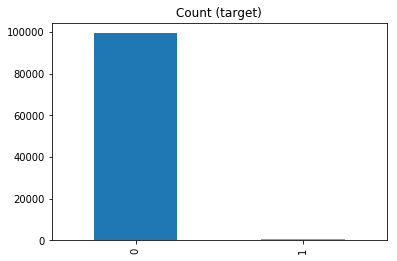

In [9]:
#A visual of unbalanced data
train_num["Response"].value_counts().plot(kind='bar', title='Count (target)');

In [17]:
#Re-sampling data

# Divide by class
df_class_0 = train_num[train_num["Response"] == 0]
df_class_1 = train_num[train_num["Response"] == 1]

Random under-sampling:
1    60000
0    40000
Name: Response, dtype: int64


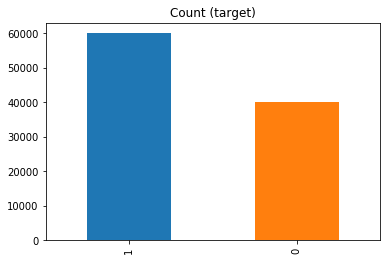

In [26]:
#undersampling
df_class_0_under = df_class_0.sample(40000)

#oversampling
df_class_1_over = df_class_1.sample(60000,replace=True)

df_test = pd.concat([df_class_0_under, df_class_1_over], axis=0)

print('Random under-sampling:')
print(df_test["Response"].value_counts())

df_test["Response"].value_counts().plot(kind='bar', title='Count (target)');


In [27]:
#Remove ID and Response

X=df_test
y=df_test["Response"]
X=X.iloc[:,1:-1] #remove I and Response
print(X.head(),y.head())

       L0_S0_F0  L0_S0_F2      ...       L3_S37_F3948  L3_S37_F3950
54094     0.000     0.000      ...                0.0           0.0
61026    -0.095    -0.071      ...                0.0           0.0
90468     0.069     0.145      ...                0.0           0.0
53255    -0.140    -0.131      ...                0.0           0.0
71442     0.056     0.086      ...                0.0           0.0

[5 rows x 172 columns] 54094    0
61026    0
90468    0
53255    0
71442    0
Name: Response, dtype: int64


In [28]:
#Import `RandomForestClassifier`
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
names = X.columns.values
# Build the model
rfc = RandomForestClassifier(random_state=0)
# Fit the model
rfc.fit(X, y)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.01)

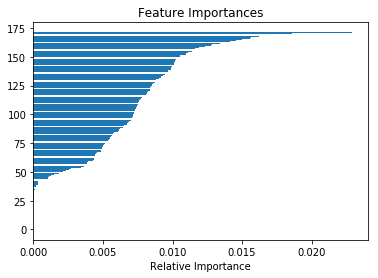

In [29]:
from sklearn.feature_selection import SelectFromModel
importances = rfc.feature_importances_
indices = np.argsort(importances)


plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.xlabel('Relative Importance')

sfm = SelectFromModel(rfc, threshold=0.01)
sfm.fit(X,y)

In [30]:
names = X.columns.values
RF_col = []
for feature_list_index in sfm.get_support(indices=True): 
    #print(names[feature_list_index])
    RF_col.append(names[feature_list_index])
print('\n Columns chosen using Random Forest:\n',RF_col)




 Columns chosen using Random Forest:
 ['L0_S0_F0', 'L0_S0_F2', 'L0_S0_F18', 'L0_S0_F20', 'L0_S0_F22', 'L0_S1_F24', 'L0_S1_F28', 'L3_S29_F3336', 'L3_S29_F3351', 'L3_S29_F3367', 'L3_S29_F3373', 'L3_S29_F3379', 'L3_S29_F3430', 'L3_S29_F3458', 'L3_S29_F3479', 'L3_S30_F3519', 'L3_S30_F3629', 'L3_S30_F3709', 'L3_S30_F3744', 'L3_S30_F3749', 'L3_S30_F3754', 'L3_S30_F3759', 'L3_S30_F3769', 'L3_S30_F3809', 'L3_S33_F3857', 'L3_S33_F3859', 'L3_S33_F3861', 'L3_S33_F3865', 'L3_S36_F3920']


In [31]:
X=X[RF_col]
print('\n Shape of data after choosing important features:',X.shape)


 Shape of data after choosing important features: (100000, 29)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(penalty='l2',random_state=42, solver='saga')
lr.fit(X_train,y_train)
print('Logistic regression,with features extracted by RF')
print('Score for training data:',lr.score(X_train,y_train))
y_val_pred=lr.predict(X_val)
print('Score for validation data:',lr.score(X_val,y_val))

Logistic regression,with features extracted by RF
Score for training data: 0.6288
Score for validation data: 0.6275666666666667


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_val_pred)
print(confusion_matrix)

[[ 2475  9563]
 [ 1610 16352]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.61      0.21      0.31     12038
           1       0.63      0.91      0.75     17962

   micro avg       0.63      0.63      0.63     30000
   macro avg       0.62      0.56      0.53     30000
weighted avg       0.62      0.63      0.57     30000



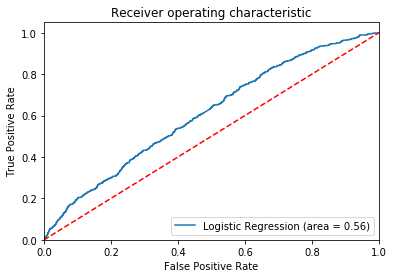

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, lr.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [37]:
test_num=pd.read_csv("../input/test_numeric.csv",nrows=100000)
X_test=test_num.iloc[:,1:] #remove Id and Response
X_test= X_test.fillna(0) #Kepping it simple by filling NaN with 0
X_test=X_test[RF_col]
X_test.head()


prediction=lr.predict(X_test)



In [45]:
my_submission = pd.DataFrame({'Id': test_num.Id, 'Pass/Fail': prediction})
my_submission.to_csv('submission.csv', index=False)